In [ ]:
# Data from UCI car Classification
# Import Packages
from sklearn.naive_bayes import  MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#columns
columns = ['Buying', 'Maint', 'Door', 'Persons', 'Lug_Boot','safety', 'class'] 
# Load the data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",  names=columns)
df.head()
print(df)
df.describe()

     Buying  Maint   Door Persons Lug_Boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


,Buying,Maint,Door,Persons,Lug_Boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
# Separate features and target  
data = df.values

X = data[:,0:6]
print(X)
Y = data[:,6]
print(Y.shape)
print(Y)

[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]
(1728,)
['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


[2 2 2 ... 2 1 3]


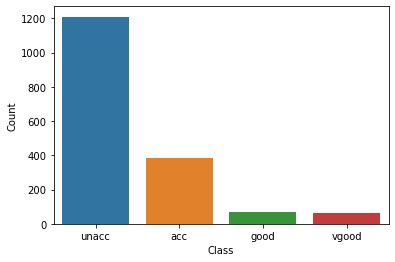

In [ ]:
#displaying count of each class type with their name
counts = df['class'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Class')
plt.ylabel('Count')
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])
X[:,1]=le.fit_transform(X[:,1])
X[:,2]=le.fit_transform(X[:,2])
X[:,3]=le.fit_transform(X[:,3])
X[:,4]=le.fit_transform(X[:,4])
X[:,5]=le.fit_transform(X[:,5])
Y=le.fit_transform(Y)
print(Y)



In [ ]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train)
print(columns)


[[0 2 2 0 1 1]
 [1 2 1 0 1 2]
 [0 2 2 2 0 0]
 ...
 [0 3 0 1 1 1]
 [1 0 1 1 0 1]
 [1 1 1 0 2 0]]
['Buying', 'Maint', 'Door', 'Persons', 'Lug_Boot', 'safety', 'class']


In [ ]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = mnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.708092485549133


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6907514450867052


In [ ]:

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = gnb.predict(X_test)


In [ ]:


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6319845857418112
